In [5]:
%pip install autodistill autodistill-yolov5 autodistill-grounding-dino supervision opencv-python

Note: you may need to restart the kernel to use updated packages.


trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None


Detections(xyxy=array([[211.42673, 211.35193, 359.99393, 260.94797]], dtype=float32), mask=None, confidence=array([0.7679198], dtype=float32), class_id=array([0]), tracker_id=None)


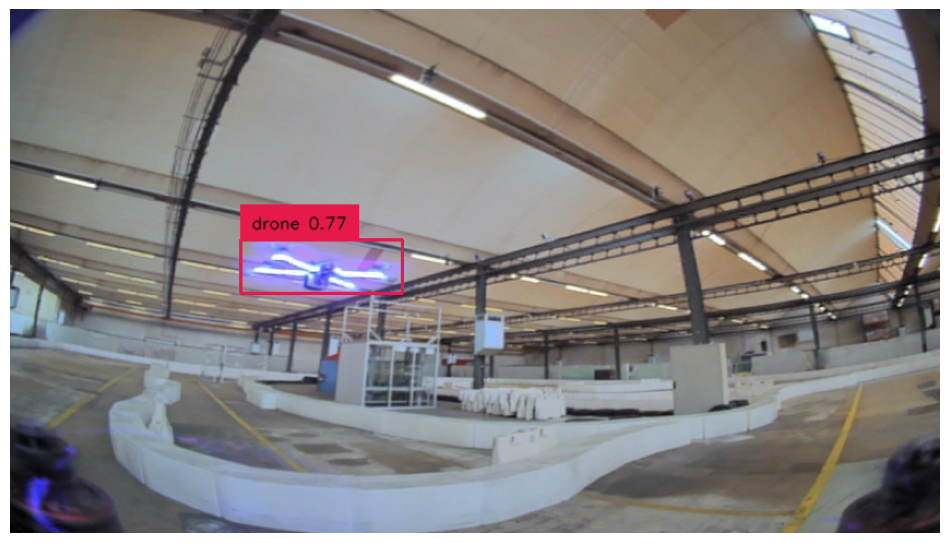

Detections(xyxy=array([[334.26984, 167.38936, 412.46216, 206.38768]], dtype=float32), mask=None, confidence=array([0.4841023], dtype=float32), class_id=array([0]), tracker_id=None)


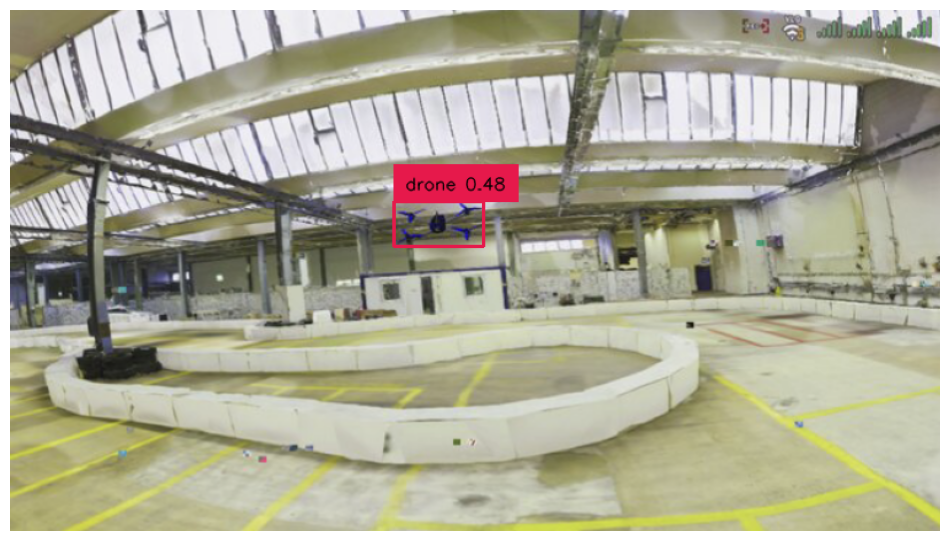

Detections(xyxy=array([[422.37512, 211.51875, 496.29547, 278.13535]], dtype=float32), mask=None, confidence=array([0.7005189], dtype=float32), class_id=array([0]), tracker_id=None)


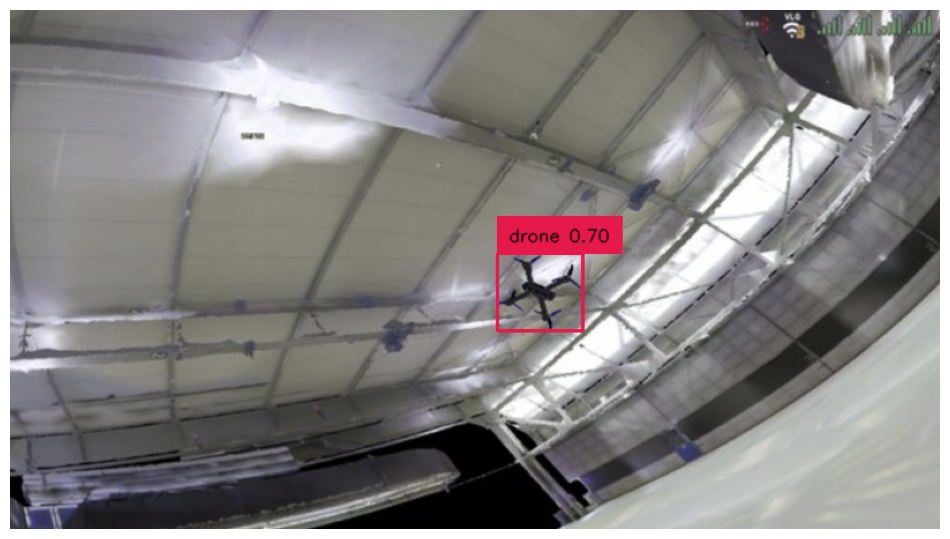

In [8]:
from autodistill_grounding_dino import GroundingDINO
from autodistill.detection import CaptionOntology
import cv2
import supervision as sv
from autodistill.utils import plot

from pathlib import Path

BASE_PATH = Path.cwd()
IMAGES_DIR = BASE_PATH / 'images'

base_model = GroundingDINO(ontology=CaptionOntology({"drone": "drone"}), box_threshold=0.4, text_threshold=0.4)

IMAGE_NAME = "images/drone_1.png"
# IMAGE_NAME = "drone.png"

for img in IMAGES_DIR.iterdir():
    predictions = base_model.predict(str(img))

    image = cv2.imread(str(img))

    box_annotator = sv.BoxAnnotator()
    labels = [f"drone {confidence:0.2f}" for _, _, confidence, _, _ in predictions]
    annotated_image = box_annotator.annotate(scene=image, detections=predictions, labels=labels)
    sv.plot_image(annotated_image)